# Gradient Boost e XGBoost

```python
# Importando bibliotecas essenciais e dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
dataset_train = pd.read_csv("./data/train_processed.csv")
dataset_test = pd.read_csv("./data/test_processed.csv")

In [4]:
dataset_train.head(5)

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Arrival Delay in Minutes,Jovem,Adulto,Idoso,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,...,0.56250,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,...,0.18750,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,...,0.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,...,0.28125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,...,0.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [5]:
dataset_test.head(5)

,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,...,Arrival Delay in Minutes,Jovem,Adulto,Idoso,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.026050,1.0,0.8,0.6,0.8,0.6,0.8,0.6,1.0,1.0,...,1.3750,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.571890,0.2,0.2,0.6,0.2,1.0,0.8,1.0,0.8,0.8,...,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.032512,0.4,0.0,0.4,0.8,0.4,0.4,0.4,0.4,0.8,...,0.0000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.675687,0.0,0.0,0.0,0.4,0.6,0.8,0.8,0.2,0.2,...,0.1875,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.232431,0.4,0.6,0.8,0.6,0.8,0.2,0.4,0.4,0.4,...,0.6250,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [4]:
from sklearn.model_selection import train_test_split

X_train = dataset_train.drop("satisfaction_satisfied",axis=1)
y_train = dataset_train["satisfaction_satisfied"]

X_train, X_Val, y_train, y_Val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_test = dataset_test.drop("satisfaction_satisfied",axis=1)
y_test = dataset_test["satisfaction_satisfied"]

```python
# Aqui abaixo printamos o tamanho de cada conjunto de dados
from import matplotlib.pyplot as plt
import seaborn as sns

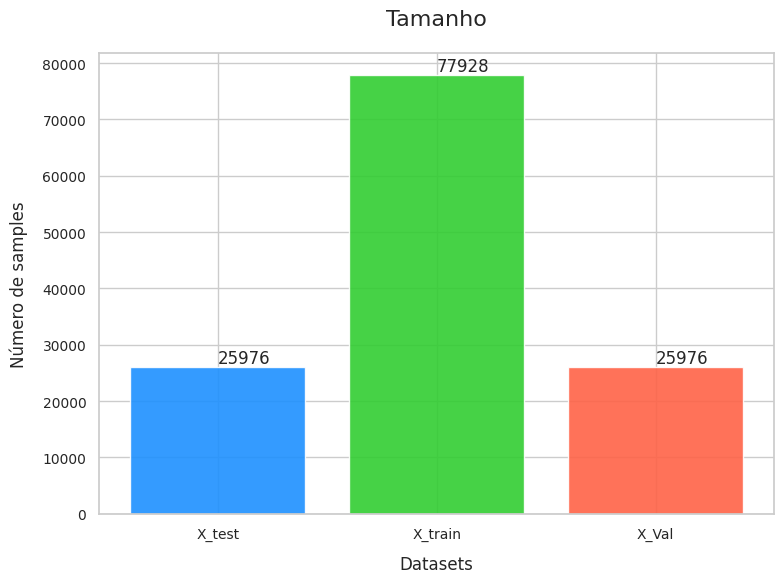

In [ ]:
sns.set(style="whitegrid")

# Tamanho de cada conjunto
X_test_samples = X_test.shape[0]
X_train_samples = X_train.shape[0]
X_Val_samples = X_Val.shape[0]

# Setando a posição e valor de cada
sizes = [X_test_samples, X_train_samples, X_Val_samples]
labels = ['X_test', 'X_train', 'X_Val']
colors = ['dodgerblue', 'limegreen', 'tomato']  # Colors for each bar

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, sizes, color=colors, alpha=0.9)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom')

plt.xlabel('Datasets', fontsize=12, labelpad=10)
plt.ylabel('Número de samples', fontsize=12, labelpad=10)
plt.title('Tamanho', fontsize=16, pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


## Importando GradientBoosting
```python
from sklearn.ensemble import GradientBoostingClassifier

In [5]:

from sklearn.ensemble import GradientBoostingClassifier

```python
# Vamos então testar uma instância simples de GradientBoosting e testar sua acurácia
from sklearn.metrics import accuracy_score

In [7]:
Test_Model = GradientBoostingClassifier()
Test_Model.fit(X_train, y_train)

GradientBoostingClassifier()

In [8]:
def simple_performance(modelo):
    percent = modelo.predict(X_test)
    resultado = accuracy_score(y_test,percent)
    print(resultado)
    total_errors = (y_test != percent).sum()
    print(X_test.shape[0], total_errors)


simple_performance(Test_Model)

0.9409069910686788
25976 1535


#### Resultados iniciais
```python
# Conseguimos um resultado interessante com uma abordagem direta, vamos realizar um teste arbitrário de hiperparâmetros

In [10]:
Segundo_teste = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=42)
Segundo_teste.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [11]:
simple_performance(Segundo_teste)

0.8896288882044965
25976 2867


#### Resultados
```python
# Regredimos o bom resultado inicial, portanto é fundamental utilizar uma ferramenta para encontrar um resultado interessante para hiperparâmetros
from sklearn.model_selection import GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV

# Grid de parâmetros a serem testados
param_grid = {
    'n_estimators': list(range(10,50,10)),  
    'max_depth': [None] + list(range(10,30,10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4]
}

# instanciando o modelo
gb = GradientBoostingClassifier(random_state=42)

# instanciando o GridSearch com o grid de parâmetros e o modelo
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   6.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   6.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   5.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   6.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   7.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=  13.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=  13.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=  12.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=  11.2s
[CV] END max_depth=N

: 

### Melhores parâmetros
```python
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40}

In [ ]:
teste_gs = GradientBoostingClassifier(max_depth = 10, min_samples_leaf= 1, min_samples_split = 10, n_estimators = 40)
teste_gs.fit(X_train, y_train)
simple_performance(teste_gs)

0.9584616569140745
25976 1079


### Variando maais parâmetros 

In [9]:
param_grid ={
    # Antigos Parâmetros
    'max_depth': [10],
    'min_samples_leaf': [1], 
    'min_samples_split': [10], 
    'n_estimators': [40],
    
    # Novos Parâmetros
    'subsample': [None, 0.6, 0.8, 1.0],
    'criterion': [None, 'friedman_mse'],
    'learning_rate' : [None, 0.01, 0.05, 0.1, 0.2]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END criterion=None, learning_rate=None, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=40, subsample=None; total time=   0.0s
[CV] END criterion=None, learning_rate=None, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=40, subsample=None; total time=   0.0s
[CV] END criterion=None, learning_rate=None, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=40, subsample=None; total time=   0.0s
[CV] END criterion=None, learning_rate=None, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=40, subsample=None; total time=   0.0s
[CV] END criterion=None, learning_rate=None, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=40, subsample=None; total time=   0.0s
[CV] END criterion=None, learning_rate=None, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=40, subsample=0.6; total time=   0.0s
[CV] END criterion=No

C:\Users\rubin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
140 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rubin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rubin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-p

Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40, 'subsample': 1.0}
Best cross-validation score: 0.96


In [10]:
tst2_gb = GradientBoostingClassifier(**{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40, 'subsample': 1.0})
tst2_gb.fit(X_train, y_train)
simple_performance(tst2_gb)

0.9587696335078534
25976 1071


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, roc_curve, auc, mean_squared_error, 
                             accuracy_score, precision_score, recall_score, f1_score, 
                             classification_report)
from scipy.stats import ks_2samp

def evaluate_model(model):
    # Previsões
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculando métricas
    mse = mean_squared_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Imprimindo as métricas
    print("MSE:", mse)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    # Matriz de Confusão
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Matriz de Confusão:\n", conf_matrix)
    
    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()
    
    # Teste KS
    ks_stat, ks_pvalue = ks_2samp(y_test, y_pred)
    print("KS Statistic:", ks_stat, "P-Value:", ks_pvalue)
    
    # Relatório de Classificação
    print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

    return {
        'mse': mse,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'ks_stat': ks_stat,
        'ks_pvalue': ks_pvalue
    }


MSE: 0.0412303664921466
Accuracy: 0.9587696335078534
Precision: 0.964902807775378
Recall: 0.9402788739805314
F1 Score: 0.9524317121918721
Matriz de Confusão:
 [[14183   390]
 [  681 10722]]


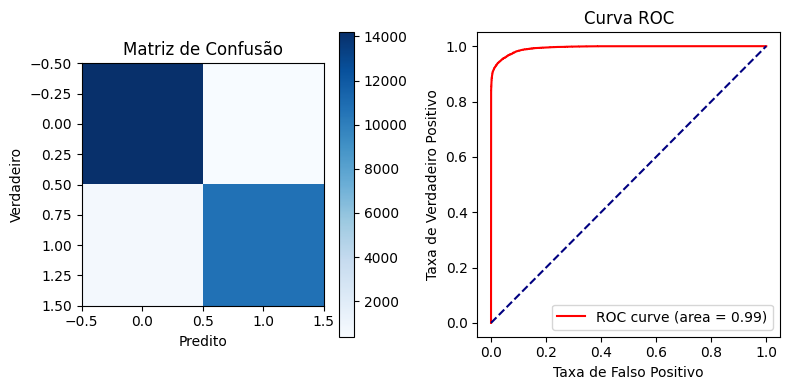

KS Statistic: 0.011202648598706566 P-Value: 0.07620085263254828

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     14573
         1.0       0.96      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



{'mse': 0.0412303664921466,
 'accuracy': 0.9587696335078534,
 'precision': 0.964902807775378,
 'recall': 0.9402788739805314,
 'f1': 0.9524317121918721,
 'roc_auc': 0.9938941062814282,
 'ks_stat': 0.011202648598706566,
 'ks_pvalue': 0.07620085263254828}

In [12]:
evaluate_model(tst2_gb)

## XGBoost

In [ ]:
%pip install xgboost

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

param_grid = {
    # o xgboost não possui uma equivalência para o criterion, Min_samples_leaf, 
    'eta': [0.01, 0.1, 0.2], # equivalente à Learning Rate do GradientBoost
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'min_child_weight': [1, 2, 4],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Fitting 3 folds for each of 162 candidates, totalling 486 fits


C:\Users\rubin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\rubin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\rubin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarnin

Best parameters: {'eta': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score: 0.96


C:\Users\rubin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:46:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


MSE: 0.03853557129658146
Accuracy: 0.9614644287034185
Precision: 0.9723029422448238
Recall: 0.9389634306761379
F1 Score: 0.9553424046397502
Matriz de Confusão:
 [[14268   305]
 [  696 10707]]


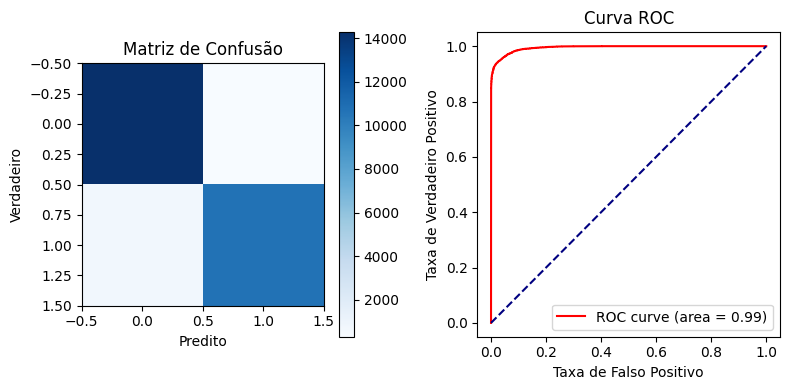

KS Statistic: 0.015052356020942459 P-Value: 0.005502486384411866

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     14573
         1.0       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



{'mse': 0.03853557129658146,
 'accuracy': 0.9614644287034185,
 'precision': 0.9723029422448238,
 'recall': 0.9389634306761379,
 'f1': 0.9553424046397502,
 'roc_auc': 0.9946638176858826,
 'ks_stat': 0.015052356020942459,
 'ks_pvalue': 0.005502486384411866}

In [14]:
best_params = {'eta': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 200, 'subsample': 0.8}

xgb_best = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', **best_params)

xgb_best.fit(X_train, y_train)

evaluate_model(xgb_best)